In [2]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt
from topic_modelling import get_topics
import time

nlp = en_core_web_lg.load()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
colors = ['skyblue', 'red', 'yellow']

In [4]:
def create_graph(final_nodes, cnt):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    print("\nTotal number of extracted pairs:", len(edge))
    print("\nEdges: ", edge)
    print("\nEntities: ", final_nodes)
    if(len(edge)==0 or len(final_nodes)==0):
        print('False')
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color=colors[cnt], node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G, edge_labels

{0: ["The Commission revoked IIG's registration in November 2019.", "As alleged, Hu grossly overvalued the assets in IIG's flagship hedge fund, resulting in the fund paying inflated fees to IIG, some of which went to Hu personally.", 'The complaint, filed on July 17, 2020, charges Hu with violating Section 17(a) of the Securities Act of 1933, Section 10(b) of the Securities Exchange Act of 1934 and Rule 10b-5 thereunder, and Sections 206(1) and 206(2) of the Investment Advisers Act of 1940.', 'Hu consented to a bifurcated settlement, agreeing to be permanently enjoined from violations of the charged provisions with monetary relief in an amount to be determined by the court at a later date upon motion of the Commission.', "The SEC previously charged IIG with fraud on November 21, 2019, and revoked IIG's registration as an investment adviser on November 26, 2019."], 1: ['On February 1, 2021, Judge Denise L. Cote of the U.S. District Court for the Southern District of New York entered a p

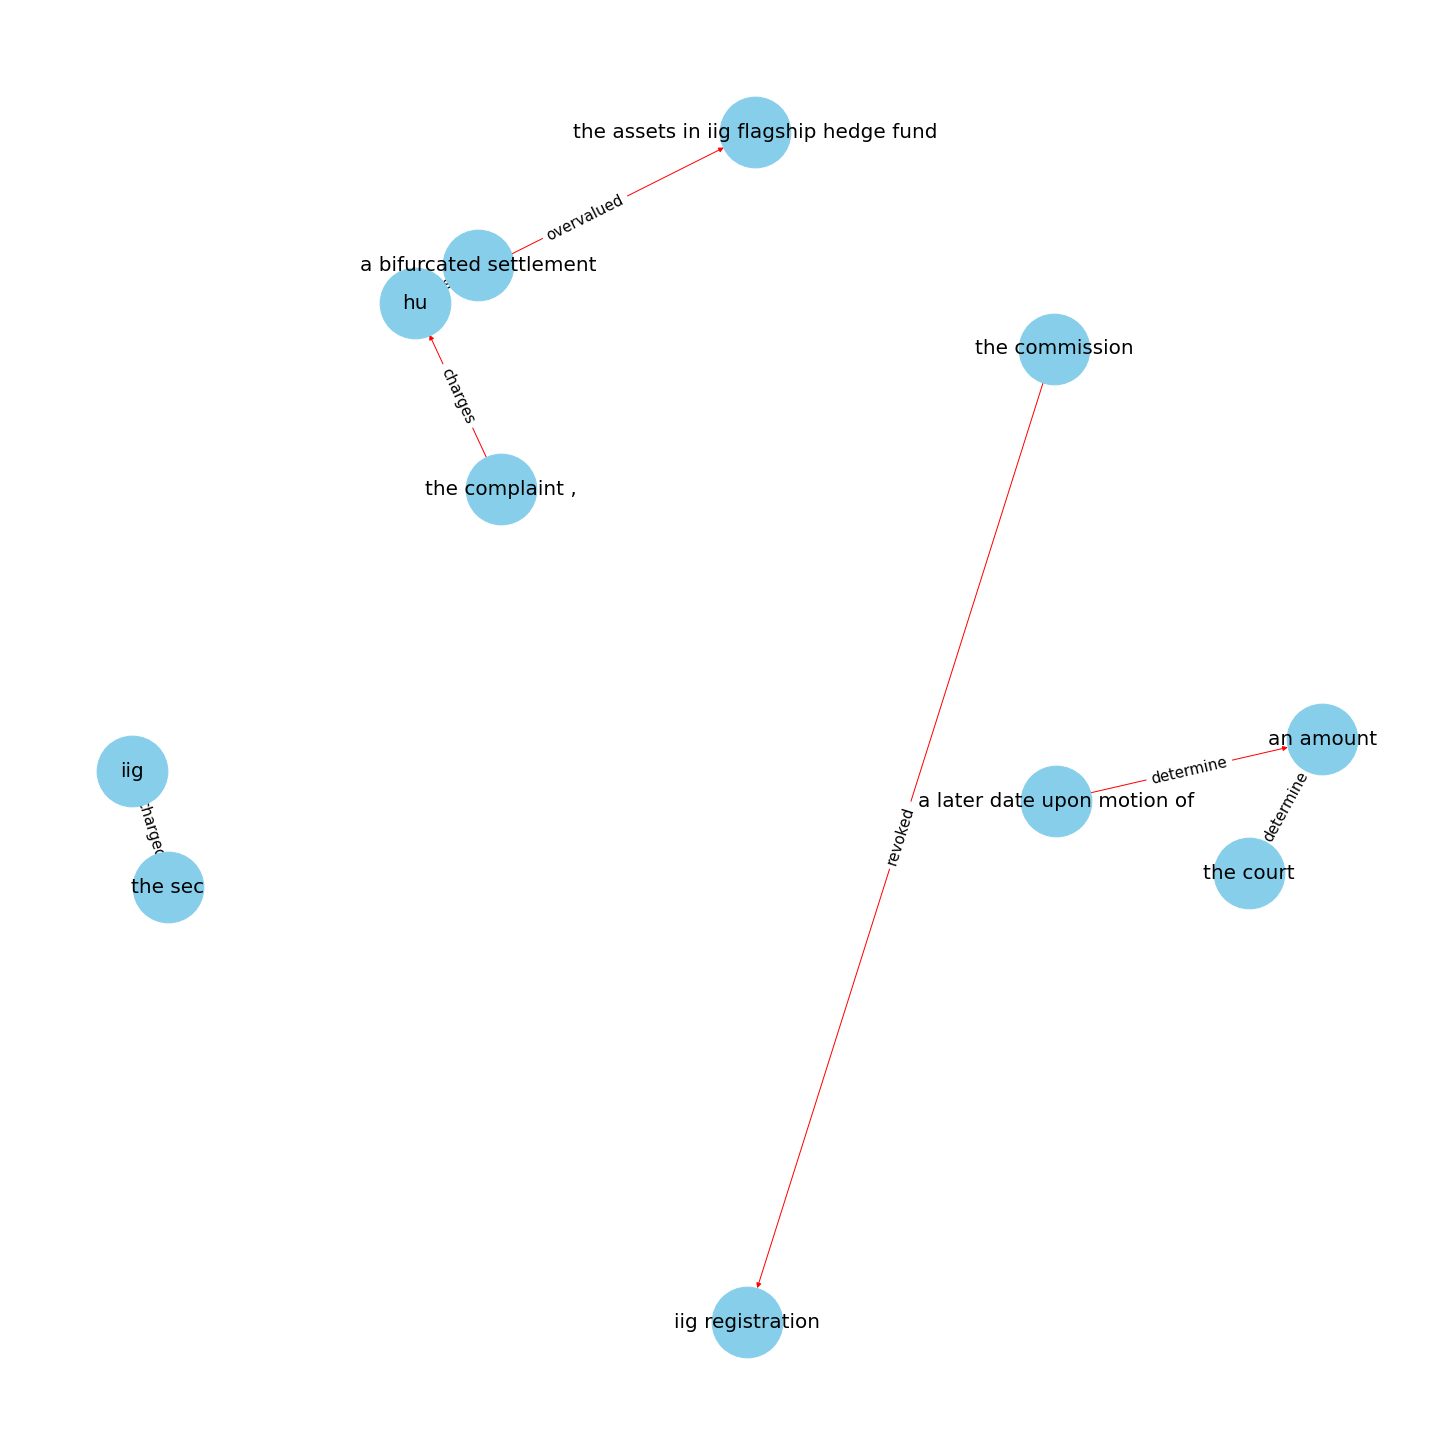

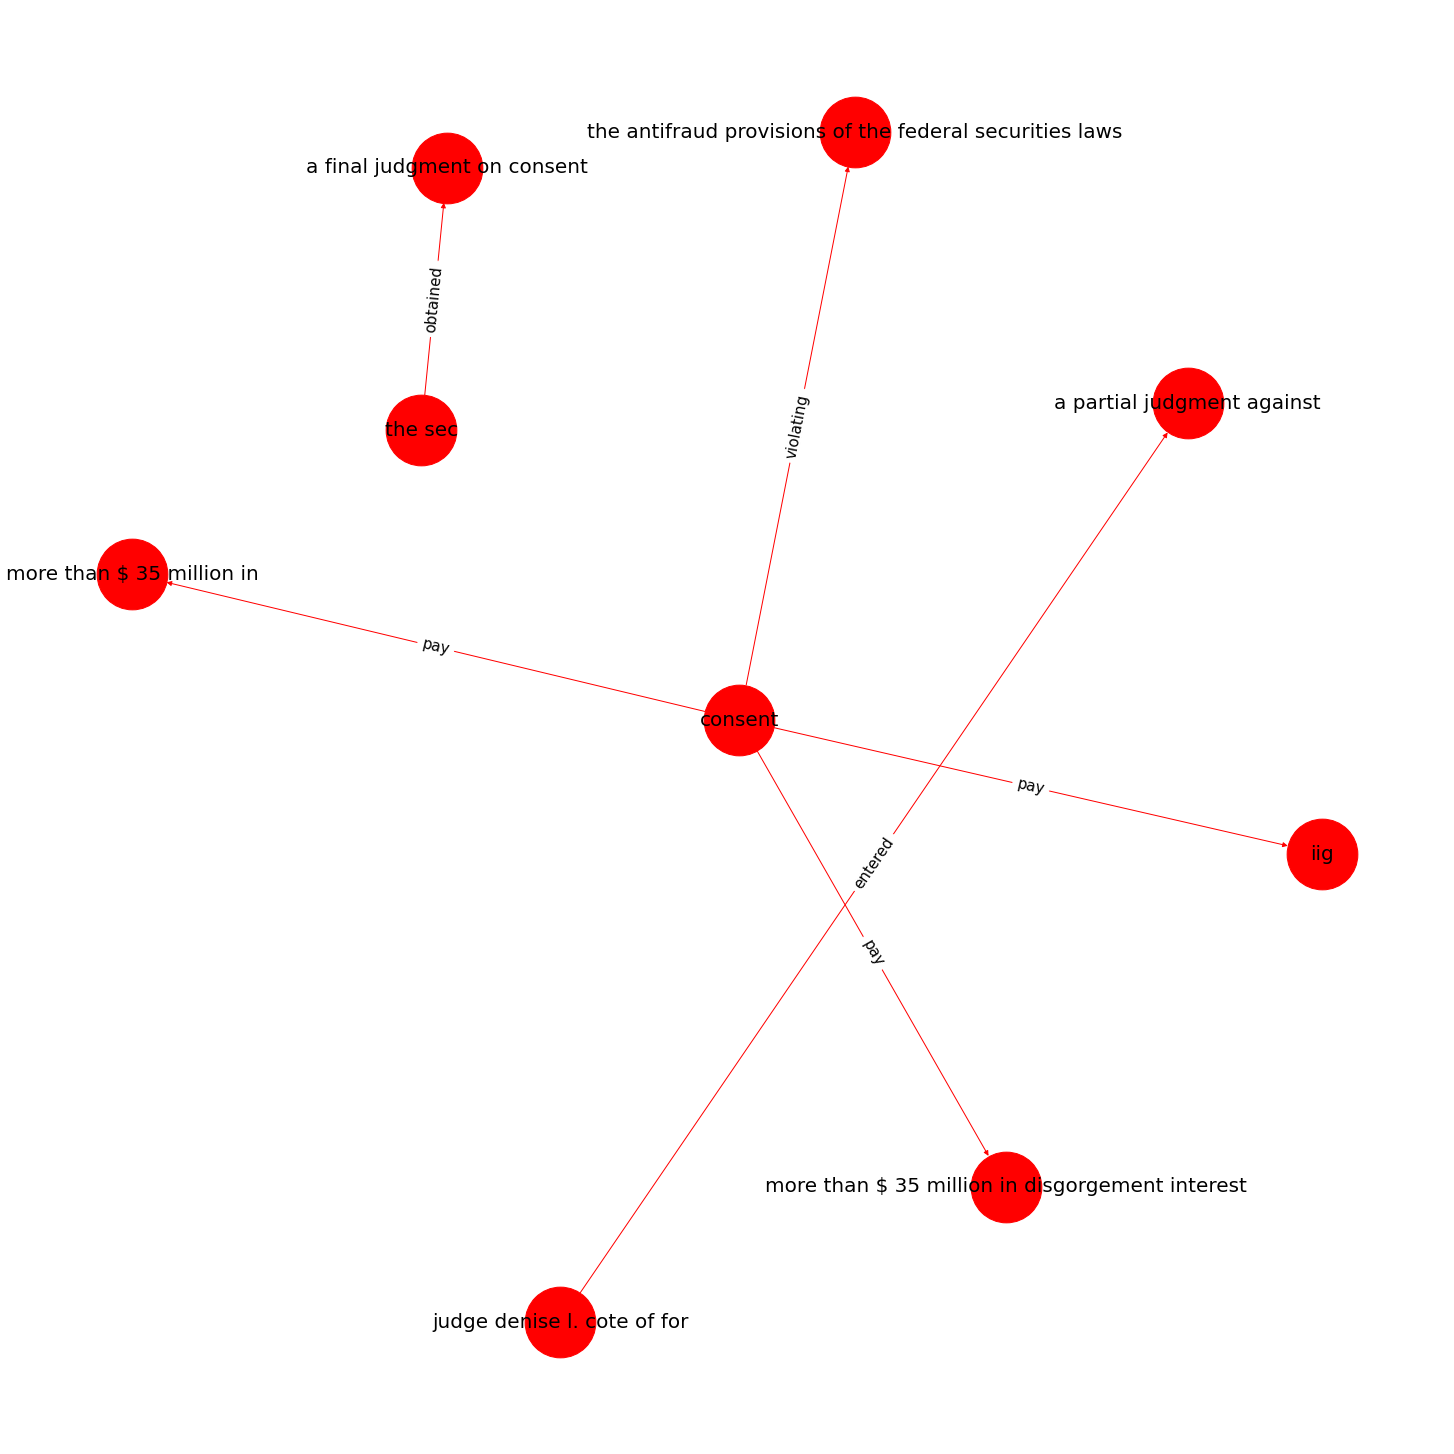

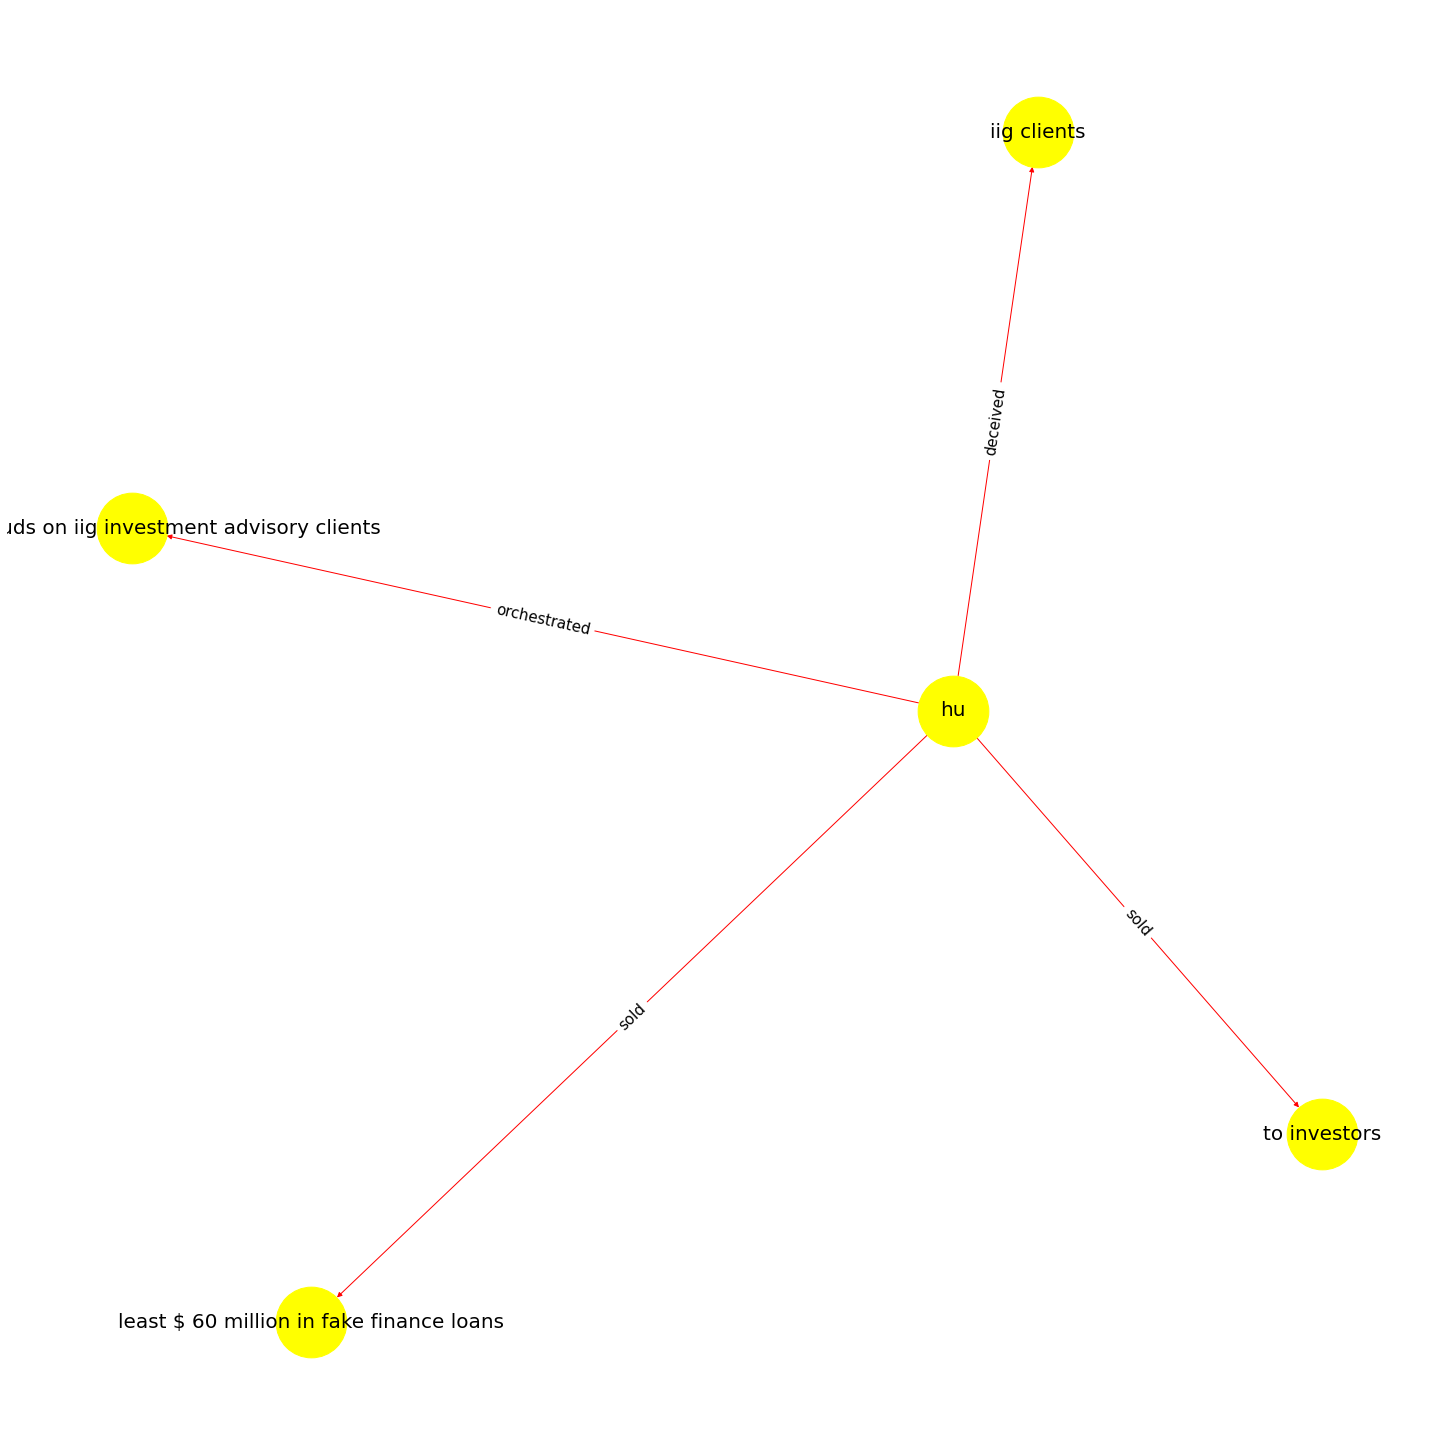

In [5]:
no_of_topics = 3
topics = get_topics('docs/text3.txt', no_of_topics)
cnt=-1

print(topics)

graphs = []
for i in topics:
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        print(svos)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    graphs.append(create_graph(final_nodes, cnt))
    name = str(time.time())
    plt.savefig('./images/' + name + '.png')


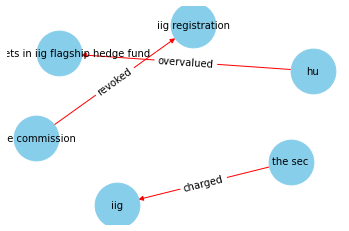

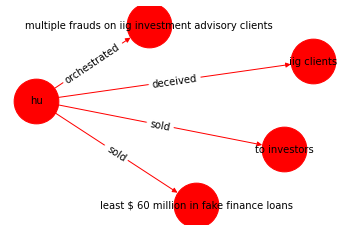

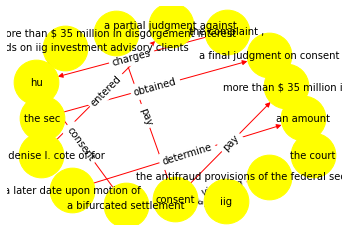

In [6]:
i=0
for graph in graphs:
    ax = plt.subplots()
    pos = nx.spring_layout(graph[0],k=10)
    nx.draw(graph[0], with_labels=True, node_color=colors[i], node_size=2000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=10, ax=None)
    nx.draw_networkx_edge_labels(graph[0],pos,edge_labels=graph[1], font_size=10)
    i=i+1
